 # 02: Model Training & Baseline Evaluation

 **Objective:** To train, evaluate, and compare several baseline classification models using the cleaned and preprocessed data from the previous phase.

 **Workflow:**
 1.  **Setup & Load Data**: Import libraries and load the **cleaned** dataset.
 2.  **Feature Engineering**: Select final features, apply log transformation to handle skew, and encode the target variable.
 3.  **Data Splitting & Scaling**: Perform a stratified train-test split and apply Min-Max scaling to the features.
 4.  **Baseline Model Training**: Train a suite of diverse classification models.
 5.  **Model Comparison**: Evaluate and compare the performance of each model using accuracy and classification reports.
 6.  **Feature Importance Analysis**: Investigate which features are most influential for the top-performing tree-based models.
 7.  **Summary & Next Steps**: Conclude with a summary of findings and identify the best model to carry forward for hyperparameter tuning.
 ---

In [2]:
# ==============================================================================
# 1. SETUP & LOAD CLEANED DATA
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configure settings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# --- Dynamic Pathing ---
from pathlib import Path
current_dir = Path.cwd()
base_dir = current_dir.parent if current_dir.name == 'notebooks' else current_dir
# --- Pointing to the PROCESSED data from Notebook 01 ---
data_path = base_dir / 'data' / 'processed' / 'water_quality_cleaned.csv'
reports_dir = base_dir / 'reports' / 'figures'

# Create directories if they don't exist
reports_dir.mkdir(parents=True, exist_ok=True)

# --- Load Dataset ---
try:
    df = pd.read_csv(data_path)
    print(f"✅ Cleaned dataset loaded successfully from '{data_path}'. Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: Cleaned dataset not found. Please run the `01_eda...` notebook first to generate it.")
    df = pd.DataFrame()

✅ Cleaned dataset loaded successfully from 'c:\Users\Fernado\Desktop\ML_Project\data\processed\water_quality_cleaned.csv'. Shape: (18860, 24)


 ## 2. Feature Engineering
 ---
 Here, we prepare our data for modeling. This involves:
 - **Selecting** the most predictive features identified during the EDA.
 - **Transforming** these features with a log function to correct the severe skewness.
 - **Encoding** our categorical target variable into numerical format.


In [3]:
# ==============================================================================
# 2. FEATURE ENGINEERING
# ==============================================================================
if not df.empty:
    # --- 2.1 Feature Selection ---
    features = ['EC', 'Cl', 'TDS', 'Na']
    target = 'Water Quality Classification'
    X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning
    y = df[target]
    print("✅ Features and target selected.")
    
    # --- 2.2 Feature Transformation (Handling Skew) ---
    # Apply np.log1p which calculates log(1 + x) to handle skew and zero values
    for col in features:
        X[col] = np.log1p(X[col])
    print("✅ Log transformation applied to handle feature skewness.")
    
    # --- 2.3 Target Variable Encoding ---
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    class_names = le.classes_
    print("✅ Target variable encoded.")
    print(f"   Original Labels: {le.classes_}")
    print(f"   Encoded Labels: {np.unique(y_encoded)}")

✅ Features and target selected.
✅ Log transformation applied to handle feature skewness.
✅ Target variable encoded.
   Original Labels: ['Excellent' 'Good' 'Poor' 'Unsuitable for Drinking'
 'Very Poor yet Drinkable']
   Encoded Labels: [0 1 2 3 4]


 ## 3. Data Splitting & Scaling
 ---
 We split the data into training and testing sets. A stratified split maintains the class distribution. We then scale the features **after** splitting to prevent data leakage from the test set into the training process.


In [4]:
# ==============================================================================
# 3. DATA SPLITTING & SCALING
# ==============================================================================
if not df.empty:
    # --- 3.1 Stratified Train-Test Split ---
    # Use an 80/20 split and stratify to maintain class proportions
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.2,
        random_state=42,
        stratify=y_encoded
    )
    print("✅ Data split into stratified training and testing sets.")
    print(f"   X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # --- 3.2 Feature Scaling ---
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("✅ Features scaled using MinMaxScaler.")

✅ Data split into stratified training and testing sets.
   X_train shape: (15088, 4), X_test shape: (3772, 4)
✅ Features scaled using MinMaxScaler.


 ## 4. Baseline Model Training
 ---
 Now we train a variety of classification models on our preprocessed data. This helps us establish a performance baseline and identify the most promising model types for this specific problem.



--- Training Logistic Regression ---
✅ Results for Logistic Regression:
   Accuracy: 0.8295
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.96      0.68      0.80       149
                        Good       0.66      0.41      0.51       307
                        Poor       0.77      0.87      0.82      1056
     Unsuitable for Drinking       0.93      0.93      0.93      1320
     Very Poor yet Drinkable       0.78      0.80      0.79       940
     
                    accuracy                           0.83      3772
                   macro avg       0.82      0.74      0.77      3772
                weighted avg       0.83      0.83      0.82      3772
     


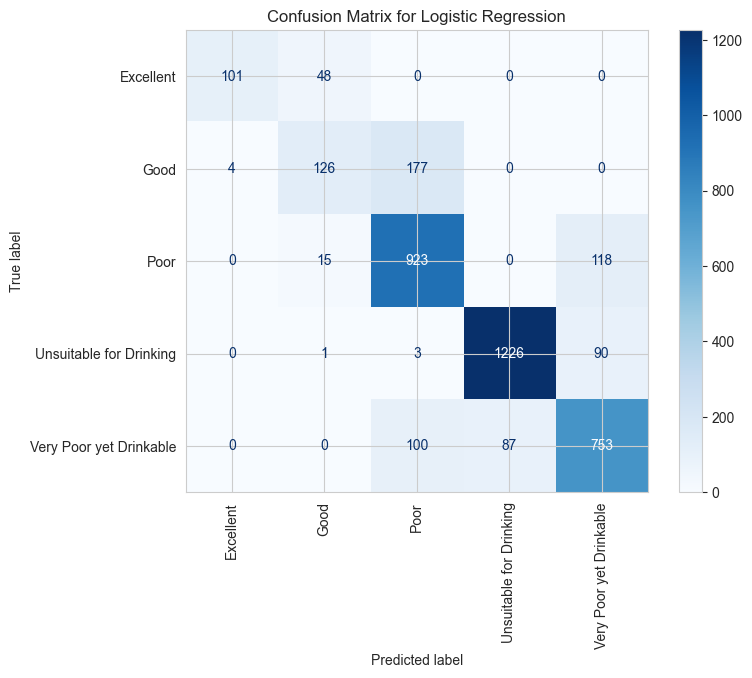

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_Logistic_Regression.png'

--- Training K-Nearest Neighbors ---
✅ Results for K-Nearest Neighbors:
   Accuracy: 0.9409
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.95      0.95      0.95       149
                        Good       0.90      0.87      0.88       307
                        Poor       0.93      0.94      0.94      1056
     Unsuitable for Drinking       0.98      0.97      0.97      1320
     Very Poor yet Drinkable       0.91      0.93      0.92       940
     
                    accuracy                           0.94      3772
                   macro avg       0.93      0.93      0.93      3772
                weighted avg       0.94      0.94      0.94      3772
     


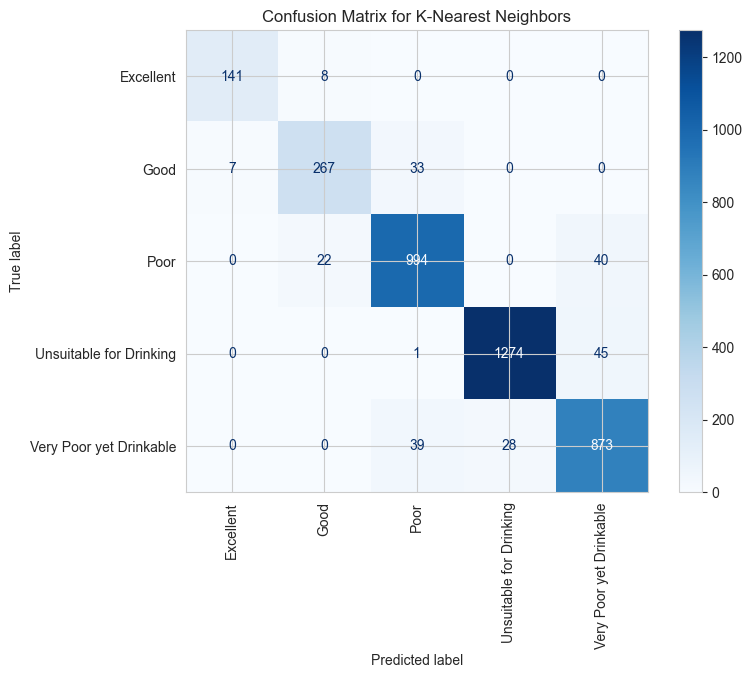

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_K-Nearest_Neighbors.png'

--- Training Naïve Bayes ---
✅ Results for Naïve Bayes:
   Accuracy: 0.8120
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.95      0.80      0.87       149
                        Good       0.72      0.73      0.72       307
                        Poor       0.82      0.78      0.80      1056
     Unsuitable for Drinking       0.98      0.82      0.89      1320
     Very Poor yet Drinkable       0.67      0.87      0.75       940
     
                    accuracy                           0.81      3772
                   macro avg       0.83      0.80      0.81      3772
                weighted avg       0.83      0.81      0.82      3772
     


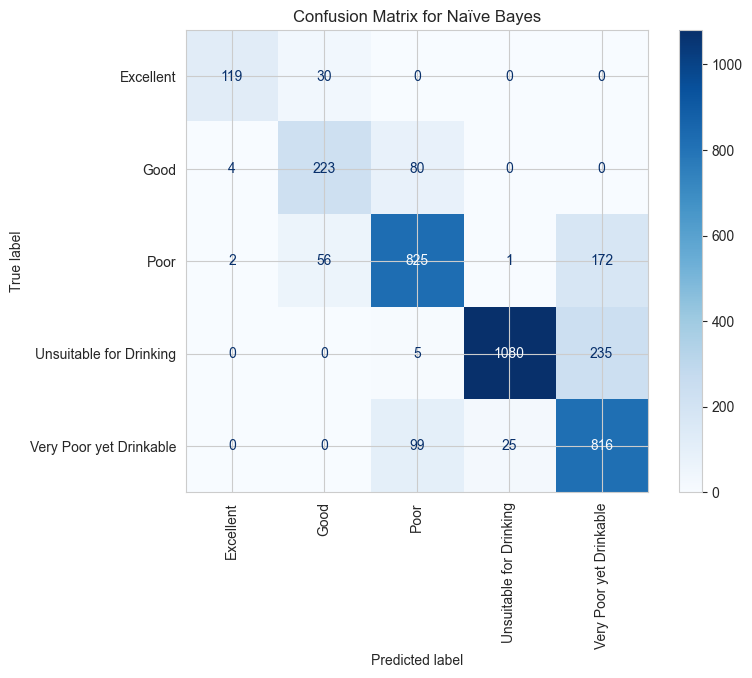

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_Naïve_Bayes.png'

--- Training Random Forest ---
✅ Results for Random Forest:
   Accuracy: 0.9711
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.98      0.95      0.97       149
                        Good       0.94      0.93      0.94       307
                        Poor       0.97      0.97      0.97      1056
     Unsuitable for Drinking       0.99      0.99      0.99      1320
     Very Poor yet Drinkable       0.96      0.96      0.96       940
     
                    accuracy                           0.97      3772
                   macro avg       0.97      0.96      0.96      3772
                weighted avg       0.97      0.97      0.97      3772
     


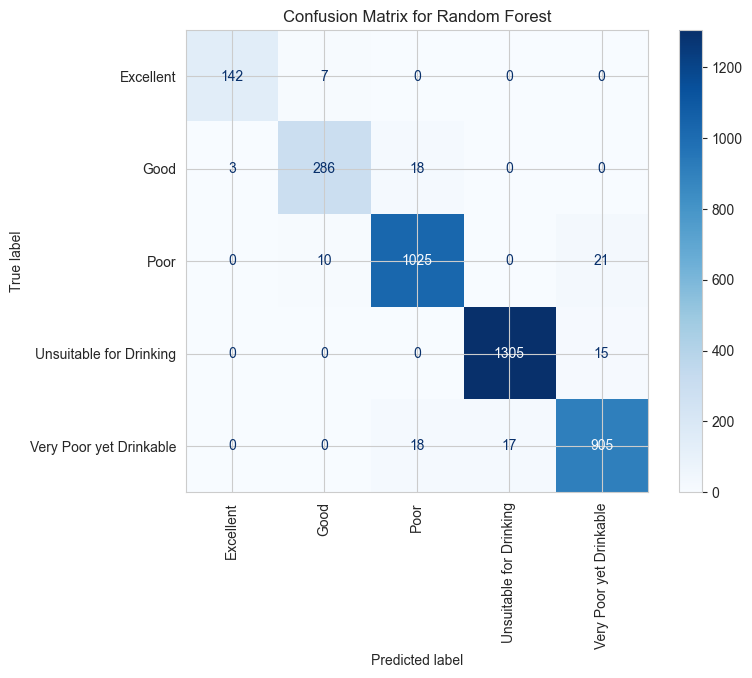

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_Random_Forest.png'

--- Training Gradient Boosting ---
✅ Results for Gradient Boosting:
   Accuracy: 0.9671
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.96      0.95      0.95       149
                        Good       0.93      0.91      0.92       307
                        Poor       0.96      0.96      0.96      1056
     Unsuitable for Drinking       0.99      0.99      0.99      1320
     Very Poor yet Drinkable       0.95      0.97      0.96       940
     
                    accuracy                           0.97      3772
                   macro avg       0.96      0.95      0.96      3772
                weighted avg       0.97      0.97      0.97      3772
     


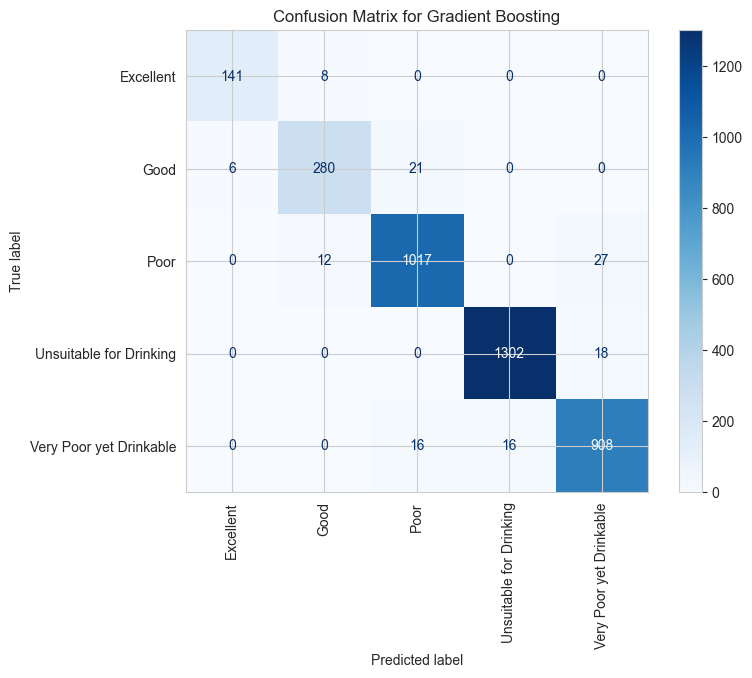

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_Gradient_Boosting.png'

--- Training MLP Classifier ---
✅ Results for MLP Classifier:
   Accuracy: 0.9698
   Classification Report:
                              precision    recall  f1-score   support
     
                   Excellent       0.98      0.95      0.97       149
                        Good       0.94      0.92      0.93       307
                        Poor       0.96      0.97      0.97      1056
     Unsuitable for Drinking       0.99      0.99      0.99      1320
     Very Poor yet Drinkable       0.96      0.97      0.96       940
     
                    accuracy                           0.97      3772
                   macro avg       0.97      0.96      0.96      3772
                weighted avg       0.97      0.97      0.97      3772
     


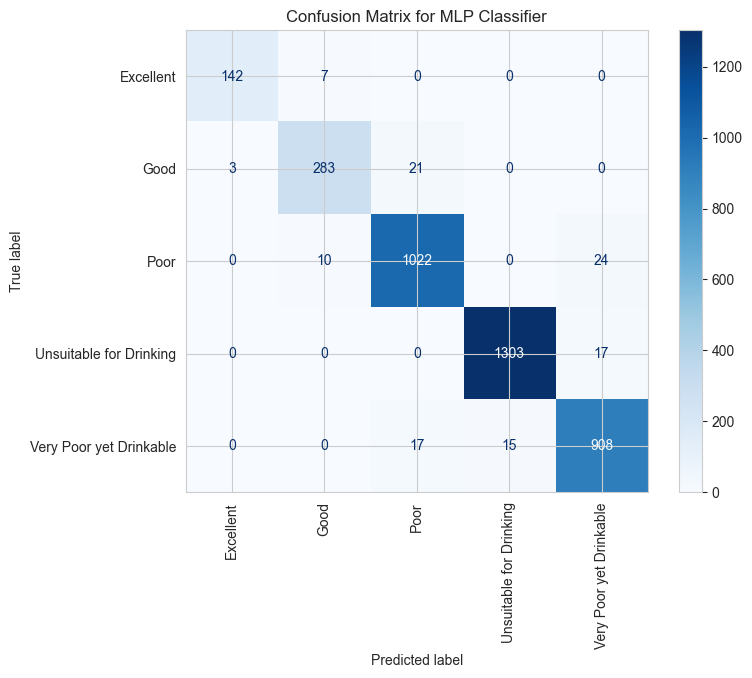

✅ Confusion matrix saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\confusion_matrix_MLP_Classifier.png'


In [5]:
# ==============================================================================
# 4. BASELINE MODEL TRAINING
# ==============================================================================
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000)
}

results = {}

if not df.empty:
    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
        results[name] = accuracy
        
        print(f"✅ Results for {name}:")
        print(f"   Accuracy: {accuracy:.4f}")
        print("   Classification Report:")
        # Indent the report for better readability
        for line in report.split('\n'):
            print(f"     {line}")
        
        # Visualize and Save Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        fig, ax = plt.subplots(figsize=(8, 6))
        disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
        ax.set_title(f'Confusion Matrix for {name}')
        
        cm_path = reports_dir / f'confusion_matrix_{name.replace(" ", "_")}.png'
        plt.savefig(cm_path, bbox_inches='tight')
        plt.show()
        print(f"✅ Confusion matrix saved to '{cm_path}'")

 ## 5. Model Performance Comparison
 ---
 A visual comparison of the accuracy scores helps in quickly identifying the highest-performing baseline models.


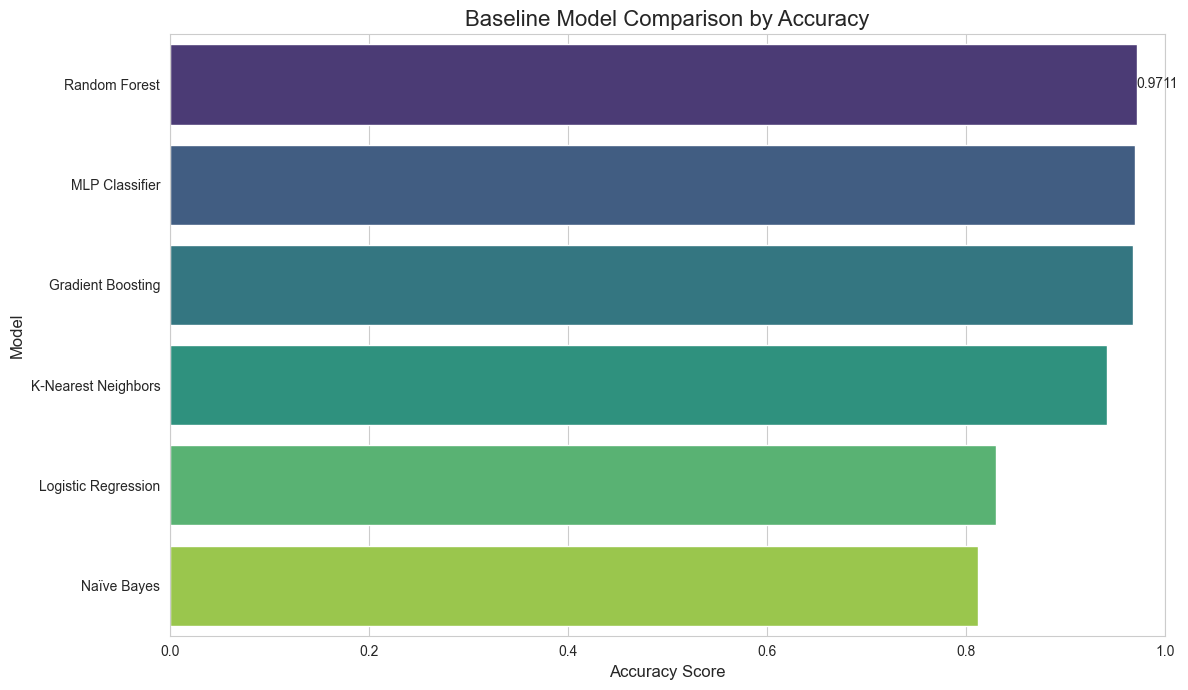


🏆 Best Performing Model (by Accuracy): Random Forest with an accuracy of 0.9711


In [6]:
# ==============================================================================
# 5. MODEL PERFORMANCE COMPARISON
# ==============================================================================
if results:
    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)
    
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
    plt.title('Baseline Model Comparison by Accuracy', fontsize=16)
    plt.xlabel('Accuracy Score', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.xlim(0, 1.0)
    
    # Add accuracy labels to the bars
    ax.bar_label(ax.containers[0], fmt='%.4f')
    
    plt.tight_layout()
    plt.show()

    best_model_name = results_df.iloc[0]['Model']
    print(f"\n🏆 Best Performing Model (by Accuracy): {best_model_name} with an accuracy of {results[best_model_name]:.4f}")


 ## 6. Feature Importance Analysis
 ---
 For tree-based models like Random Forest and Gradient Boosting, we can investigate which features were most influential in making predictions. This adds a layer of interpretability to our "black box" models.



--- Analyzing Feature Importance for Tree-Based Models ---


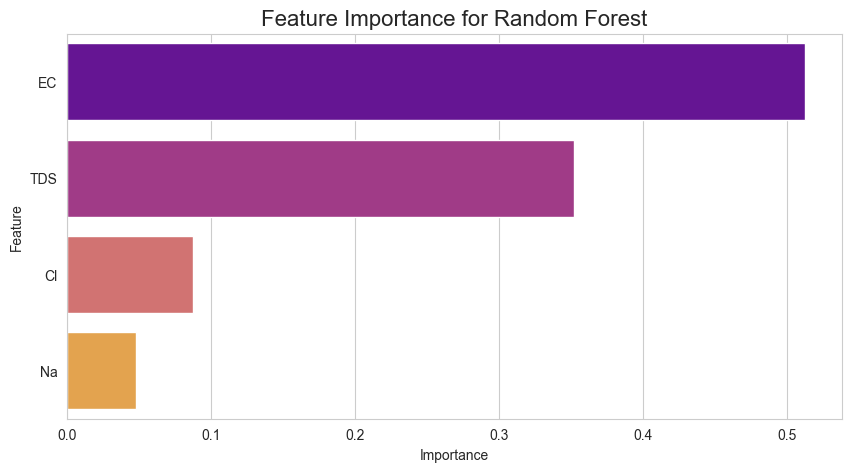

✅ Feature importance plot for Random Forest saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\feature_importance_Random_Forest.png'


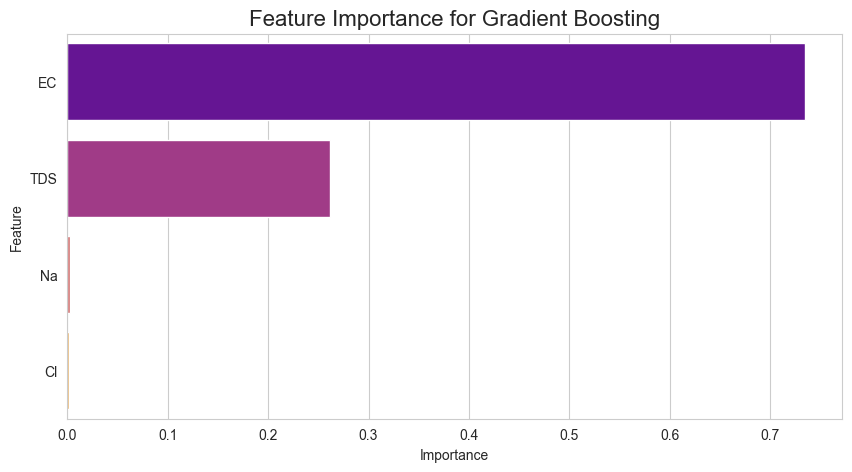

✅ Feature importance plot for Gradient Boosting saved to 'c:\Users\Fernado\Desktop\ML_Project\reports\figures\feature_importance_Gradient_Boosting.png'


In [7]:
# ==============================================================================
# 6. FEATURE IMPORTANCE ANALYSIS
# ==============================================================================
tree_models_to_check = ["Random Forest", "Gradient Boosting"]

if not df.empty:
    print("\n--- Analyzing Feature Importance for Tree-Based Models ---")
    for name in tree_models_to_check:
        if name in models:
            model = models[name]
            importances = model.feature_importances_
            feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
            
            plt.figure(figsize=(10, 5))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
            plt.title(f'Feature Importance for {name}', fontsize=16)
            
            fi_path = reports_dir / f'feature_importance_{name.replace(" ", "_")}.png'
            plt.savefig(fi_path, bbox_inches='tight')
            plt.show()
            print(f"✅ Feature importance plot for {name} saved to '{fi_path}'")


## 7. Summary & Next Steps
---
This notebook established a performance baseline across multiple models on the cleaned and preprocessed dataset.

**Findings:**
- The preprocessing steps, especially the **log transformation** to correct for skew and **Min-Max scaling**, provided a solid foundation and led to high performance across all complex models.
- The model comparison clearly shows that **Random Forest** is the top-performing model, achieving an outstanding accuracy of **97.11%**.
- The MLP Classifier (96.98%) and Gradient Boosting (96.71%) models were also highly effective, demonstrating the robustness of the dataset for machine learning.
- Feature importance analysis for both Random Forest and Gradient Boosting revealed that **Electrical Conductivity (EC)** is by far the most influential feature, followed by **Total Dissolved Solids (TDS)**.

**Next Steps:**

The next logical step is to take the best-performing model, **Random Forest**, and fine-tune its hyperparameters to maximize its predictive power. This will be the focus of the `03_hyperparameter_tuning.ipynb` notebook.